In [5]:
import pandas as pd
import matplotlib.pyplot as plt

In [37]:
inter_colleges = pd.read_csv("intermediate-colleges-in-pakistan.csv")

### **Basic Information of Data**

In [38]:
print(inter_colleges.columns)
print(inter_colleges.shape)
print(inter_colleges["Rating"].max())

Index(['Name', 'Location', 'Study Program', 'Sector', 'Affiliation', 'Rating'], dtype='object')
(1630, 6)
5*


### **Summary Statistics**

In [39]:
print(inter_colleges.describe())

                    Name Location  \
count               1630     1626   
unique              1630     1573   
top     Campus.pk Lahore  Chakwal   
freq                   1       11   

                                            Study Program   Sector  \
count                                                1630     1101   
unique                                                774        2   
top     FA ICS Computer Science FSc Pre Medical FSc Pr...  Private   
freq                                                   49      562   

                   Affiliation Rating  
count                      155   1630  
unique                      97     21  
top     University of Sargodha     0*  
freq                         7   1119  


### **Check missing values and replace it**

In [40]:
print(inter_colleges.isna().sum())
inter_colleges.fillna("Unknown",inplace=True)
print(inter_colleges.isna().sum())

Name                0
Location            4
Study Program       0
Sector            529
Affiliation      1475
Rating              0
dtype: int64
Name             0
Location         0
Study Program    0
Sector           0
Affiliation      0
Rating           0
dtype: int64


###**Check for duplicates**

In [41]:
inter_colleges.drop_duplicates(inplace=True)
print(inter_colleges.duplicated().sum())

0


### **Data Transformation**

In [42]:
inter_colleges["Rating"] = inter_colleges['Rating'].str.replace('*','').astype(float)
print(inter_colleges["Rating"].head())

0    0.0
1    5.0
2    4.0
3    3.0
4    5.0
Name: Rating, dtype: float64


## **Analysis and Visualization**

In [43]:
### Group by sector
coll_by_sect = inter_colleges.groupby("Sector")["Name"].count()
print(coll_by_sect) # MORE PRIVATE COLLEGES

Sector
Private    562
Public     539
Unknown    529
Name: Name, dtype: int64


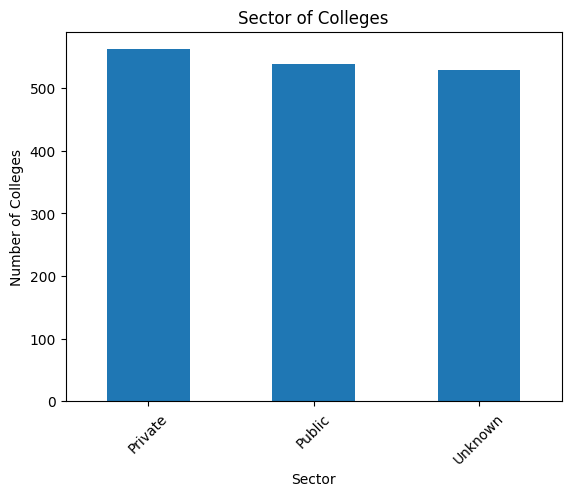

In [44]:
coll_by_sect.plot(kind="bar",rot=45)
plt.title("Sector of Colleges")
plt.xlabel("Sector")
plt.ylabel("Number of Colleges")
plt.show()

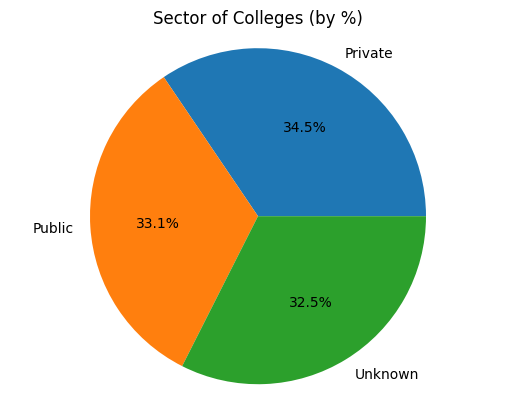

In [45]:
plt.pie(coll_by_sect, labels=coll_by_sect.index, autopct='%1.1f%%')
plt.axis('equal')
plt.title("Sector of Colleges (by %)")
plt.show()

In [46]:
### Group by ratings
coll_by_rat = inter_colleges.groupby("Rating")["Name"].count()
print(coll_by_rat)   # 158 colleges with 5 rating, Most colleges are zero rated

top10 = inter_colleges[inter_colleges["Rating"] == 5.0]["Name"].head(10)  # top-rated first 10 colleges
print(top10)

Rating
0.00    1119
0.25       2
0.50       5
0.75       1
1.00      41
1.25      18
1.50       2
1.75       1
2.00      42
2.25       3
2.50       2
2.75       1
3.00      77
3.25       9
3.50       6
3.75       8
4.00     113
4.25       4
4.50      10
4.75       8
5.00     158
Name: Name, dtype: int64
1           Allama Iqbal Open University Aiou Islamabad
4     Lahore College For Women University (Lcwu) Lahore
5                  University Of Agriculture Faisalabad
6     Pir Mehr Ali Shah Arid Agriculture University ...
7        International Islamic University Iiu Islamabad
8                     Kinnaird College For Women Lahore
16             Allama Iqbal Open University Lahore AIOU
17                             Islamia College Peshawar
24                     Lahore Garrison University (LGU)
31    College of Tourism and Hotel Management COTHM ...
Name: Name, dtype: object


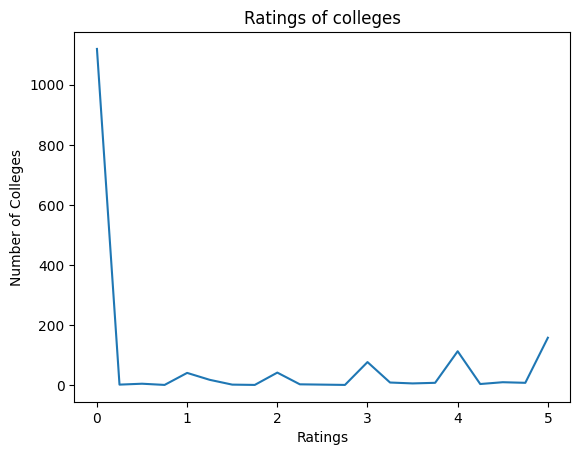

In [47]:
coll_by_rat.plot(kind="line")
plt.title("Ratings of colleges")
plt.xlabel("Ratings")
plt.ylabel("Number of Colleges")
plt.show()

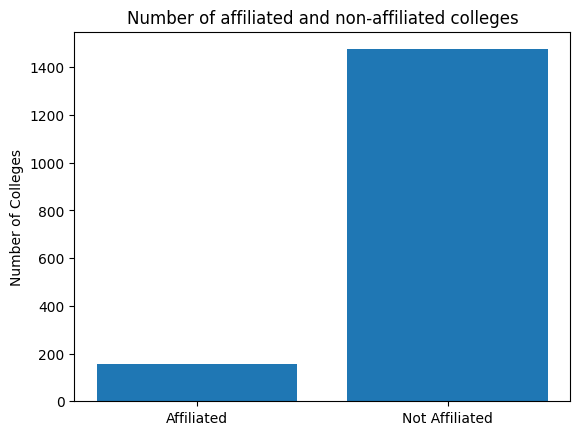

In [48]:
### Affiliations
non_aff = (inter_colleges["Affiliation"] == "Unknown").sum()
aff = (inter_colleges["Affiliation"].count()) - non_aff
cat = ["Affiliated","Not Affiliated"]

plt.bar(cat,[aff,non_aff])
plt.title("Number of affiliated and non-affiliated colleges")
plt.ylabel("Number of Colleges")
plt.show()

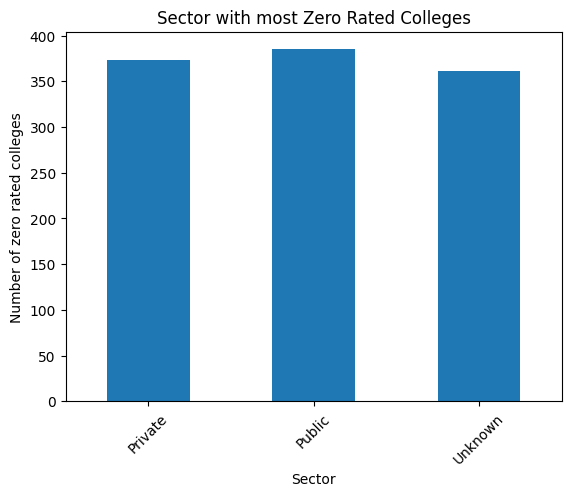

In [49]:
### More zero rating in private or public?
zero_rat = inter_colleges[inter_colleges["Rating"] == 0]
zero_rat_sec = zero_rat.groupby("Sector")["Rating"].count() # similar results but more public colleges that are rated 0

zero_rat_sec.plot(kind="bar",rot=45)
plt.title("Sector with most Zero Rated Colleges")
plt.xlabel("Sector")
plt.ylabel("Number of zero rated colleges")
plt.show()

City
Lahore        148
Islamabad      99
Faisalabad     75
Karachi        73
Rawalpindi     69
Name: Name, dtype: int64


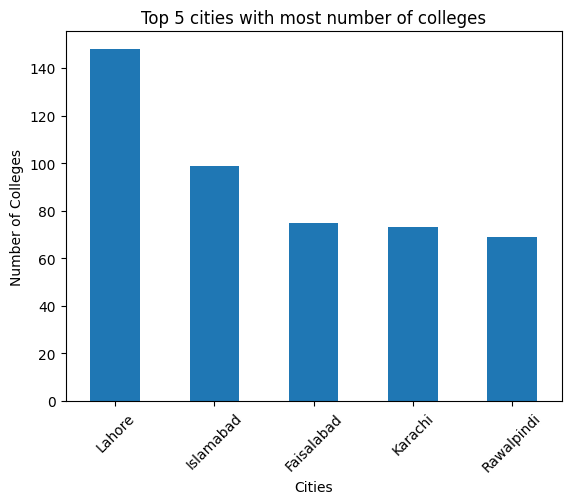

In [35]:
### Top 5 cities with most number of colleges

##Get city from location
inter_colleges["City"] = inter_colleges["Location"].str.split().str[-1].str.replace(r'-\d+$', '', regex=True)

#Top 5 cities with most colleges
top5_city = inter_colleges.groupby("City")["Name"].count().sort_values(ascending=False).head(5)
print(top5_city)

top5_city.plot(kind="bar",rot=45)
plt.title("Top 5 cities with most number of colleges")
plt.xlabel("Cities")
plt.ylabel("Number of Colleges")
plt.show()